# Template matching with noise
This repo demonstrate the robustness of template matching against noise.
The following script run 2 detections with the same template, image and parameters.
Only for the second detection we introduce some random noise in the image.

In [1]:
# 1st import the package and check its version
import mtm
print("mtm version : ", mtm.__version__)

from mtm import matchTemplates
from mtm.detection import plotDetections

from skimage import io
from skimage.util import random_noise

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

mtm version :  1.0.1


Let's open one image from the Zenodo repo using scikit-image

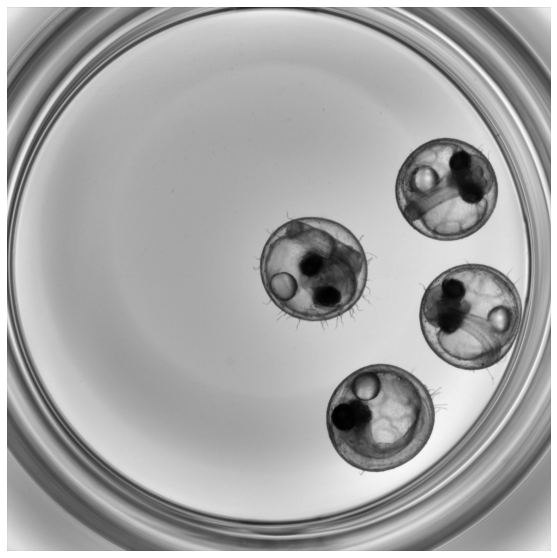

In [2]:
URL = r"https://zenodo.org/record/2650147/files/WE00049---E001--PO01--LO001--CO6--00000000_00.01.00_00.16.00%2C000.jpg"
image = io.imread(URL)
plt.figure(figsize = (10,10))
plt.axis("off")
plt.imshow(image, cmap="gray")

Let's crop one of the embryo to use as a template.

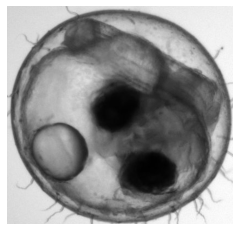

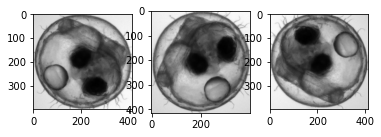

In [3]:
temp0 = image[784:784+400, 946:946+414] # with well 49 
plt.axis("off")
plt.imshow(temp0, cmap="gray")

listTemplate = [temp0]
listLabels = ["0"]

# Initialise figure
f, axarr = plt.subplots(1,3)
axarr[0].imshow(temp0, cmap="gray")

for i,angle in enumerate([90,180]):
    rotated = np.rot90(temp0, k=i+1) # NB: rotate not good here, turns into float!
    listTemplate.append(rotated)
    listLabels.append(str(angle))
    axarr[i+1].imshow(rotated, cmap="gray")

We can now call `matchTemplates` with this single template image and the initial image

In [10]:
hits = matchTemplates(image, listTemplate, listLabels, score_threshold=0.3, maxOverlap=0.3, nObjects=4)
hits

[(BoundingBox, score:1.00, xywh:(946, 784, 414, 400), index:0, 0),
 (BoundingBox, score:0.59, xywh:(1525, 968, 414, 400), index:2, 180),
 (BoundingBox, score:0.55, xywh:(1173, 1354, 414, 400), index:2, 180),
 (BoundingBox, score:0.54, xywh:(1459, 474, 400, 414), index:1, 90)]

# Adding noise
Let see the effect on the detection when we add noise to the initial image.

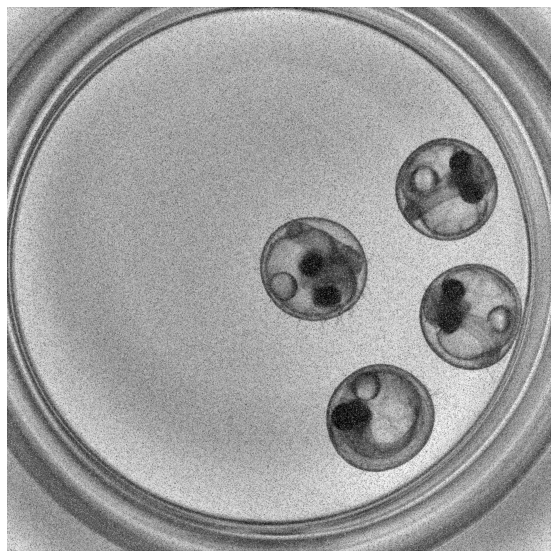

In [11]:
imageNoise = random_noise(image, mode='s&p',amount=0.2)

plt.figure(figsize = (10,10))
plt.axis("off")
plt.imshow(imageNoise, cmap="gray")

In [12]:
# Call again matchTemplates with the noisy image this time, but the same template
hitsNoise = matchTemplates(imageNoise,  listTemplate, listLabels, score_threshold=0.3, maxOverlap=0.3, nObjects=4)

print("Initial detections")
print(np.array(hits))

print("\nDetections with noise")
print(np.array(hitsNoise))

Initial detections
[(BoundingBox, score:1.00, xywh:(946, 784, 414, 400), index:0, 0)
 (BoundingBox, score:0.59, xywh:(1525, 968, 414, 400), index:2, 180)
 (BoundingBox, score:0.55, xywh:(1173, 1354, 414, 400), index:2, 180)
 (BoundingBox, score:0.54, xywh:(1459, 474, 400, 414), index:1, 90)]

Detections with noise
[(BoundingBox, score:0.60, xywh:(946, 784, 414, 400), index:0, 0)
 (BoundingBox, score:0.37, xywh:(1525, 969, 414, 400), index:2, 180)
 (BoundingBox, score:0.35, xywh:(1175, 1353, 414, 400), index:2, 180)
 (BoundingBox, score:0.35, xywh:(1459, 474, 400, 414), index:1, 90)]


The coordinates of the bounding boxes are slightly shifted by a few pixels with the noisy version of the image, and as we could expect the score is also reduced.

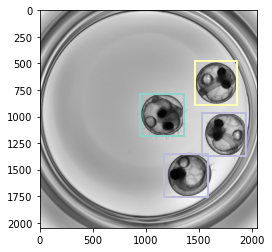

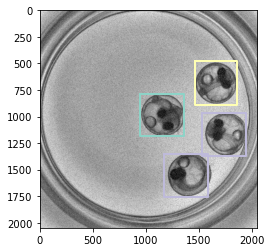

In [7]:
plotDetections(image, hits)
plotDetections(imageNoise, hitsNoise)